**Fast and Easy Image-Based Coffee Plant Disease Detection Application**

# Import Library

In [1]:
# Import Library
# Visualization
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Dir manipulation
import os
from shutil import copyfile

# Model Machine Learning
import tensorflow as tf
  # Library Optimizer
from tensorflow.keras.optimizers import RMSprop
  # Libary Image preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Matrix Manipulation
import numpy as np

# Etc
import random

In [2]:
base_dir = "D:/hamzah/skripsi/Coffee Leaf Diseases/final"
#Folder Train, Validation, and Testing
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
testing_dir = os.path.join(base_dir, 'testing')

# Directory with training  pictures
train_healthy_dir = os.path.join(train_dir, 'healthy')
train_miner_dir = os.path.join(train_dir, 'miner')
train_phoma_dir = os.path.join(train_dir, 'phoma')
train_rust_dir = os.path.join(train_dir, 'rust')

# Directory with validation pictures
validation_healthy_dir = os.path.join(validation_dir, 'healthy')
validation_miner_dir = os.path.join(validation_dir, 'miner')
validation_phoma_dir = os.path.join(validation_dir, 'phoma')
validation_rust_dir = os.path.join(validation_dir, 'rust')

# Directory with testing pictures
testing_healthy_dir = os.path.join(testing_dir, 'healthy')
testing_miner_dir = os.path.join(testing_dir, 'miner')
testing_phoma_dir = os.path.join(testing_dir, 'phoma')
testing_rust_dir = os.path.join(testing_dir, 'rust')

In [3]:
train_healthy_fnames = os.listdir( train_healthy_dir )
train_miner_fnames = os.listdir( train_miner_dir )
train_phoma_fnames = os.listdir( train_phoma_dir )
train_rust_fnames = os.listdir( train_rust_dir )

In [4]:
#Print Total Images
print('total training healthy images :', len(os.listdir(train_healthy_dir )))
print('total training miner images :', len(os.listdir(train_miner_dir )))
print('total training phoma images :', len(os.listdir(train_phoma_dir )))
print('total training rust images :', len(os.listdir(train_rust_dir )), "\n")

print('total validation healthy images :', len(os.listdir(validation_healthy_dir)))
print('total validation miner images :', len(os.listdir(validation_miner_dir)))
print('total validation phoma images :', len(os.listdir(validation_phoma_dir)))
print('total validation rust images :', len(os.listdir(validation_rust_dir)), "\n")

print('total testing healthy images :', len(os.listdir(testing_healthy_dir)))
print('total testing miner images :', len(os.listdir(testing_miner_dir)))
print('total testing phoma images :', len(os.listdir(testing_phoma_dir)))
print('total testing rust images :', len(os.listdir(testing_rust_dir)))

total training healthy images : 302
total training miner images : 362
total training phoma images : 386
total training rust images : 323 

total validation healthy images : 49
total validation miner images : 49
total validation phoma images : 49
total validation rust images : 49 

total testing healthy images : 49
total testing miner images : 49
total testing phoma images : 49
total testing rust images : 49


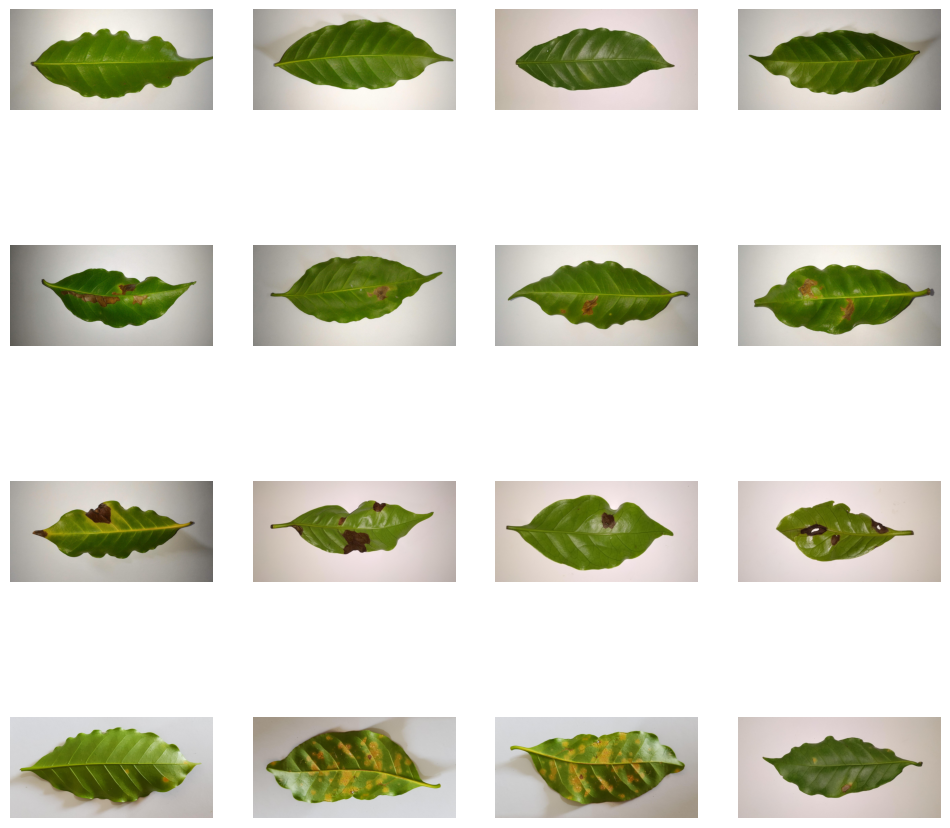

In [5]:
#Showing Sample Image each Class

%matplotlib inline

# Parameters for our graph; we'll output images in a 4x8 configuration
nrows = 8
ncols = 4

pic_index = 0 # Index for iterating over images

# Set up matplotlib fig, and size it to fit 4x8 pics
fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=4

next_healthy_pix = [os.path.join(train_healthy_dir, fname)
                for fname in train_healthy_fnames[ pic_index-4:pic_index]
               ]

next_miner_pix = [os.path.join(train_miner_dir, fname)
                for fname in train_miner_fnames[ pic_index-4:pic_index]
               ]

next_phoma_pix = [os.path.join(train_phoma_dir, fname)
                for fname in train_phoma_fnames[ pic_index-4:pic_index]
               ]

next_rust_pix = [os.path.join(train_rust_dir, fname)
                for fname in train_rust_fnames[ pic_index-4:pic_index]
               ]

for i, img_path in enumerate(next_healthy_pix+next_miner_pix+next_phoma_pix+next_rust_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


# Data Preparation & Augmentation

In [6]:
# Augmentasi ringan dan normalisasi
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Normalisasi tanpa augmentasi untuk validation set
validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
from keras.preprocessing.image import img_to_array, load_img
import os

def augment_class_images(datagen, class_dir, target_num):
    num_images = len(os.listdir(class_dir))
    total_needed = target_num - num_images
    images = os.listdir(class_dir)
    generated = 0  # Reset penghitung untuk setiap kelas

    if total_needed <= 0:
        print("Tidak perlu augmentasi untuk", class_dir)
        return

    print(f"Memulai augmentasi di {class_dir} untuk mencapai {target_num} gambar.")

    for fname in images:
        if generated >= total_needed:
            print(f"Jumlah target tercapai untuk {class_dir}.")
            break

        img_path = os.path.join(class_dir, fname)
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        # Loop untuk menghasilkan gambar baru
        for x_aug in datagen.flow(x, batch_size=1, save_to_dir=class_dir, save_prefix='aug', save_format='jpeg'):
            generated += 1
            if generated >= total_needed:
                print(f"Jumlah target tercapai dengan {fname}.")
                break

    print(f"Augmentasi total selesai untuk {class_dir}. {generated} gambar ditambahkan.")

augment_class_images(train_datagen, train_healthy_dir, 386)
augment_class_images(train_datagen, train_miner_dir, 386)
augment_class_images(train_datagen, train_phoma_dir, 386)
augment_class_images(train_datagen, train_rust_dir, 386)


Memulai augmentasi di D:/hamzah/skripsi/Coffee Leaf Diseases/final\train\healthy untuk mencapai 386 gambar.
Jumlah target tercapai dengan aug_0_1424.jpeg.
Jumlah target tercapai untuk D:/hamzah/skripsi/Coffee Leaf Diseases/final\train\healthy.
Augmentasi total selesai untuk D:/hamzah/skripsi/Coffee Leaf Diseases/final\train\healthy. 72 gambar ditambahkan.
Memulai augmentasi di D:/hamzah/skripsi/Coffee Leaf Diseases/final\train\miner untuk mencapai 386 gambar.
Jumlah target tercapai dengan miner-10.jpg.
Jumlah target tercapai untuk D:/hamzah/skripsi/Coffee Leaf Diseases/final\train\miner.
Augmentasi total selesai untuk D:/hamzah/skripsi/Coffee Leaf Diseases/final\train\miner. 24 gambar ditambahkan.
Tidak perlu augmentasi untuk D:/hamzah/skripsi/Coffee Leaf Diseases/final\train\phoma
Memulai augmentasi di D:/hamzah/skripsi/Coffee Leaf Diseases/final\train\rust untuk mencapai 386 gambar.
Jumlah target tercapai dengan rust-10.jpg.
Jumlah target tercapai untuk D:/hamzah/skripsi/Coffee Leaf 

In [9]:
# Verifikasi jumlah gambar di setiap kelas setelah augmentasi
for class_dir in [train_healthy_dir, train_miner_dir, train_phoma_dir, train_rust_dir]:
    print(f"Total images in {class_dir.split('/')[-1]}: {len(os.listdir(class_dir))}")

Total images in final\train\healthy: 386
Total images in final\train\miner: 386
Total images in final\train\phoma: 386
Total images in final\train\rust: 386


In [10]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=128,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Nonaktifkan shuffle
)

testing_generator = validation_datagen.flow_from_directory(
    testing_dir,
    target_size=(256, 256),
    batch_size=25,
    class_mode='categorical',
    shuffle=False  # Nonaktifkan shuffle
)


Found 1544 images belonging to 4 classes.
Found 196 images belonging to 4 classes.
Found 196 images belonging to 4 classes.


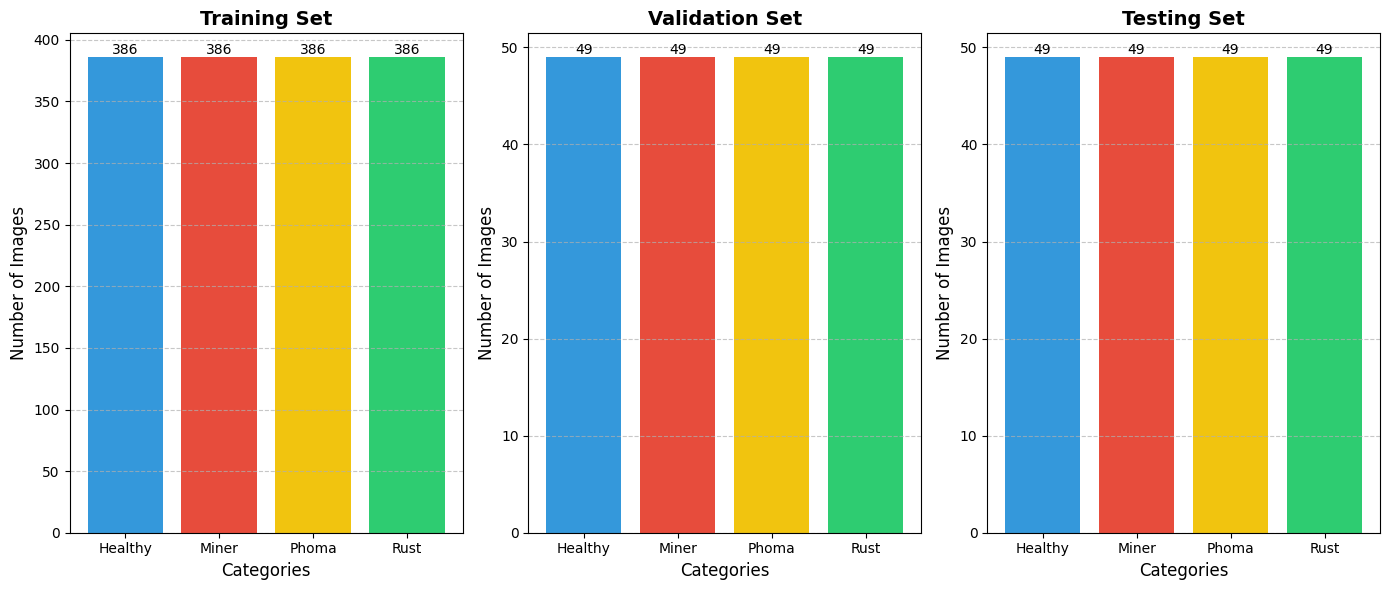

In [11]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Menghitung jumlah file di setiap direktori
train_images = [len(os.listdir(train_healthy_dir)),
                len(os.listdir(train_miner_dir)),
                len(os.listdir(train_phoma_dir)),
                len(os.listdir(train_rust_dir))]

val_images = [len(os.listdir(validation_healthy_dir)),
              len(os.listdir(validation_miner_dir)),
              len(os.listdir(validation_phoma_dir)),
              len(os.listdir(validation_rust_dir))]

test_images = [len(os.listdir(testing_healthy_dir)),
               len(os.listdir(testing_miner_dir)),
               len(os.listdir(testing_phoma_dir)),
               len(os.listdir(testing_rust_dir))]

# Kategori kelas
categories = ['Healthy', 'Miner', 'Phoma', 'Rust']

# Warna yang lebih menarik
colors = ['#3498db', '#e74c3c', '#f1c40f', '#2ecc71']

# Membuat subplot lebih lebar agar label tidak bertumpuk
plt.figure(figsize=(14, 6))

# Plotting untuk training data
plt.subplot(1, 3, 1)
bars1 = plt.bar(categories, train_images, color=colors)
plt.title('Training Set', fontsize=14, weight='bold')
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan nilai di atas batang
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2.0, bar.get_height(), int(bar.get_height()), 
             ha='center', va='bottom', fontsize=10, color='black')

# Plotting untuk validation data
plt.subplot(1, 3, 2)
bars2 = plt.bar(categories, val_images, color=colors)
plt.title('Validation Set', fontsize=14, weight='bold')
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan nilai di atas batang
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2.0, bar.get_height(), int(bar.get_height()), 
             ha='center', va='bottom', fontsize=10, color='black')

# Plotting untuk testing data
plt.subplot(1, 3, 3)
bars3 = plt.bar(categories, test_images, color=colors)
plt.title('Testing Set', fontsize=14, weight='bold')
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan nilai di atas batang
for bar in bars3:
    plt.text(bar.get_x() + bar.get_width()/2.0, bar.get_height(), int(bar.get_height()), 
             ha='center', va='bottom', fontsize=10, color='black')

# Adjust layout
plt.tight_layout()
plt.show()


## VGG16 Architecture

### Architecture

In [12]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (256, 256, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

In [13]:
for layer in base_model.layers:
    layer.trainable = False

In [14]:
from tensorflow.keras.regularizers import l2

# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(416, activation='relu', kernel_regularizer=l2(0.01))(x)

# Add a dropout rate of 0.5
x = tf.keras.layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = tf.keras.layers.Dense(4, activation='softmax')(x)

model_vgg = tf.keras.models.Model(base_model.input, x)

model_vgg.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=3.5481e-05),
              loss = 'categorical_crossentropy',
              metrics = ['acc'])


In [15]:
vgg_hist = model_vgg.fit(train_generator, validation_data = validation_generator, epochs = 2)


Epoch 1/2


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 139s 9s/step - acc: 0.3032 - loss: 10.0034 - val_acc: 0.4082 - val_loss: 9.0629
Epoch 2/2
13/13 ━━━━━━━━━━━━━━━━━━━━ 129s 9s/step - acc: 0.4715 - loss: 9.0132 - val_acc: 0.4133 - val_loss: 9.0309


In [16]:
model_vgg.evaluate(validation_generator)

7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - acc: 0.2379 - loss: 9.5073


[9.030861854553223, 0.41326531767845154]

# Hyperparameter Tunning

### Define Callback for Hyperparameter Tuning

In [17]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
        lambda epoch: 1e-5 * 10 ** (epoch / 20))

# ReduceLROnPlateau Callback: Mengurangi learning rate saat val_loss tidak membaik
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                                 patience=5, min_lr=1e-7)

# ModelCheckpoint Callback: Menyimpan model terbaik berdasarkan val_loss
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.keras', 
                                                monitor='val_loss', 
                                                save_best_only=True)

# EarlyStopping Callback: Menghentikan pelatihan jika tidak ada peningkatan val_loss setelah 3 epoch
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                  patience=5, 
                                                  restore_best_weights=True)

# Compile model with initial learning rate
model_vgg.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(learning_rate=1e-5),
                  metrics=['accuracy'])

# Training model with multiple callbacks
history = model_vgg.fit(train_generator, 
                        epochs=50,  
                        validation_data=validation_generator, 
                        callbacks=[reduce_lr, checkpoint, early_stopping])

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 134s 9s/step - accuracy: 0.5358 - loss: 8.6544 - val_accuracy: 0.7398 - val_loss: 8.3851 - learning_rate: 1.0000e-05
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 130s 9s/step - accuracy: 0.6179 - loss: 8.4523 - val_accuracy: 0.7398 - val_loss: 8.2754 - learning_rate: 1.0000e-05
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 132s 9s/step - accuracy: 0.6680 - loss: 8.2918 - val_accuracy: 0.7347 - val_loss: 8.1667 - learning_rate: 1.0000e-05
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 132s 9s/step - accuracy: 0.6552 - loss: 8.2281 - val_accuracy: 0.7959 - val_loss: 8.0620 - learning_rate: 1.0000e-05
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 133s 9s/step - accuracy: 0.6752 - loss: 8.1342 - val_accuracy: 0.7857 - val_loss: 7.9719 - learning_rate: 1.0000e-05
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 132s 10s/step - accuracy: 0.6807 - loss: 8.0536 - val_accuracy: 0.7602 - val_loss: 7.8967 - learning_rate: 1.0000e-05
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 132s 9s/step - accuracy: 0.6876

### Visualize Hyperparameter Performance

In [18]:
# Load model terbaik yang disimpan oleh ModelCheckpoint
best_model = tf.keras.models.load_model('best_model.keras')

# Evaluasi pada validation set atau testing set
loss, accuracy = best_model.evaluate(validation_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.8840 - loss: 5.0616
Validation Loss: 5.034365177154541
Validation Accuracy: 0.8928571343421936


#### Accuracy & loss plot

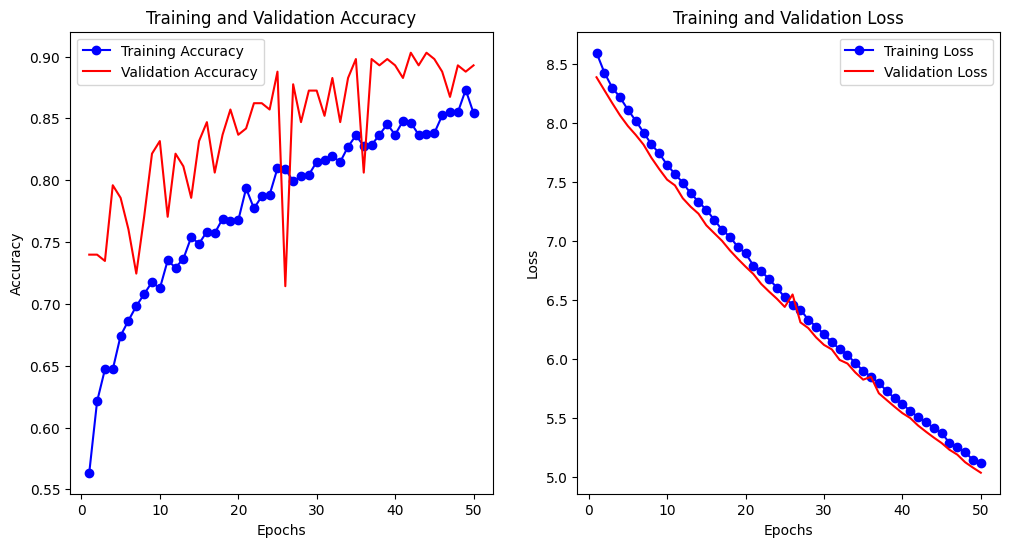

In [19]:

# Ambil nilai akurasi dan loss dari history training
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)  # Jumlah epoch

# Plot Akurasi Training dan Validation
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss Training dan Validation
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate Model

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Melakukan prediksi pada data validation
predictions = model_vgg.predict(validation_generator)

# Konversi prediksi probabilitas ke label kategori
y_pred = np.argmax(predictions, axis=1)

# Mendapatkan label aktual
y_true = validation_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report (Precision, Recall, F1-score, Accuracy)
print("Classification Report:")
print(classification_report(y_true, y_pred))


7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step
Confusion Matrix:
[[43  2  0  4]
 [ 3 40  2  4]
 [ 2  0 47  0]
 [ 3  1  0 45]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        49
           1       0.93      0.82      0.87        49
           2       0.96      0.96      0.96        49
           3       0.85      0.92      0.88        49

    accuracy                           0.89       196
   macro avg       0.90      0.89      0.89       196
weighted avg       0.90      0.89      0.89       196



7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step


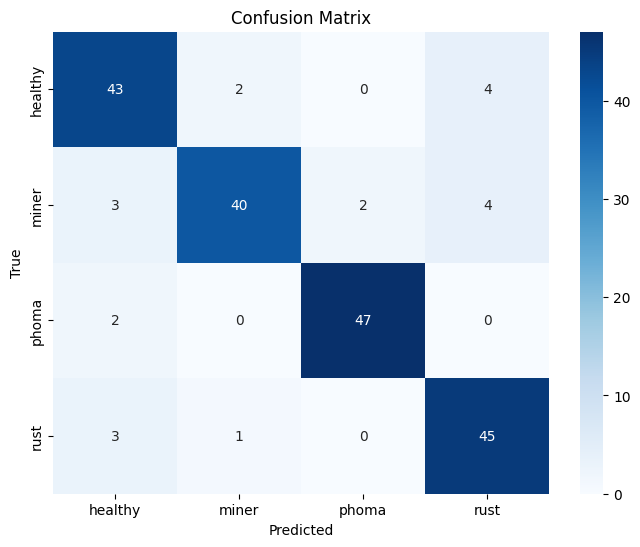

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Melakukan prediksi pada data validation
predictions = model_vgg.predict(testing_generator)

# Konversi prediksi probabilitas ke label kategori
y_pred = np.argmax(predictions, axis=1)

# Mendapatkan label aktual
y_true = testing_generator.classes

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visualisasi confusion matrix menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Fine-tuning

In [22]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import tensorflow as tf

# Load the VGG16 model
base_model = VGG16(input_shape=(256, 256, 3), include_top=False, weights='imagenet')

# Membekukan semua lapisan, kecuali lapisan terakhir (teratas)
for layer in base_model.layers[:-4]:  # Membuka 4 lapisan terakhir untuk fine-tuning
    layer.trainable = False

# Memeriksa status trainable lapisan model
for layer in base_model.layers:
    print(layer, layer.trainable)

<InputLayer name=input_layer_1, built=True> False
<Conv2D name=block1_conv1, built=True> False
<Conv2D name=block1_conv2, built=True> False
<MaxPooling2D name=block1_pool, built=True> False
<Conv2D name=block2_conv1, built=True> False
<Conv2D name=block2_conv2, built=True> False
<MaxPooling2D name=block2_pool, built=True> False
<Conv2D name=block3_conv1, built=True> False
<Conv2D name=block3_conv2, built=True> False
<Conv2D name=block3_conv3, built=True> False
<MaxPooling2D name=block3_pool, built=True> False
<Conv2D name=block4_conv1, built=True> False
<Conv2D name=block4_conv2, built=True> False
<Conv2D name=block4_conv3, built=True> False
<MaxPooling2D name=block4_pool, built=True> False
<Conv2D name=block5_conv1, built=True> True
<Conv2D name=block5_conv2, built=True> True
<Conv2D name=block5_conv3, built=True> True
<MaxPooling2D name=block5_pool, built=True> True


In [23]:
# Membuat lapisan custom di atas VGG16
x = layers.Flatten()(base_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(4, activation='softmax')(x)  # 4 class classification

# Membuat model baru
model = models.Model(base_model.input, x)

# Kompilasi model
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
# Path to save the fine-tuned model
fine_tuned_model_path = 'best_finetuned_model_vgg16.keras'

In [25]:
# Callback untuk menyimpan model terbaik dengan ekstensi .h5
model_checkpoint = ModelCheckpoint(fine_tuned_model_path, monitor='val_loss', save_best_only=True, verbose=1)

# Callback untuk mengurangi learning rate jika val_loss tidak membaik
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7)

# Callback untuk menghentikan training jika tidak ada perbaikan pada val_loss
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Melatih model dengan callbacks
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[reduce_lr, early_stopping, model_checkpoint]
)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.2882 - loss: 1.5803
Epoch 1: val_loss improved from inf to 1.12918, saving model to best_finetuned_model_vgg16.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 149s 10s/step - accuracy: 0.2910 - loss: 1.5718 - val_accuracy: 0.5714 - val_loss: 1.1292 - learning_rate: 1.0000e-05
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.4077 - loss: 1.2565
Epoch 2: val_loss improved from 1.12918 to 0.96434, saving model to best_finetuned_model_vgg16.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 147s 10s/step - accuracy: 0.4106 - loss: 1.2524 - val_accuracy: 0.6224 - val_loss: 0.9643 - learning_rate: 1.0000e-05
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.5289 - loss: 1.0459
Epoch 3: val_loss improved from 0.96434 to 0.85030, saving model to best_finetuned_model_vgg16.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 146s 10s/step - accuracy: 0.5308 - loss: 1.0438 - val_accuracy: 0.6531 - val_loss: 0.8503 - learning_rate: 1.0000e-05
Epoch 4/50
13/13 

In [26]:
best_finetuned_model = tf.keras.models.load_model(fine_tuned_model_path)
val_loss, val_accuracy = best_finetuned_model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.9638 - loss: 0.1134
Validation Loss: 0.1194232925772667
Validation Accuracy: 0.9591836929321289


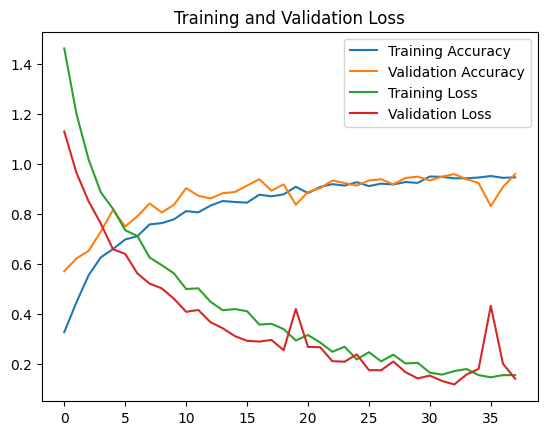

In [27]:
import matplotlib.pyplot as plt

# Plot akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step
Confusion Matrix:
[[48  0  0  1]
 [ 1 47  0  1]
 [ 0  1 48  0]
 [ 0  2  0 47]]
Classification Report:
              precision    recall  f1-score   support

     healthy       0.98      0.98      0.98        49
       miner       0.94      0.96      0.95        49
       phoma       1.00      0.98      0.99        49
        rust       0.96      0.96      0.96        49

    accuracy                           0.97       196
   macro avg       0.97      0.97      0.97       196
weighted avg       0.97      0.97      0.97       196



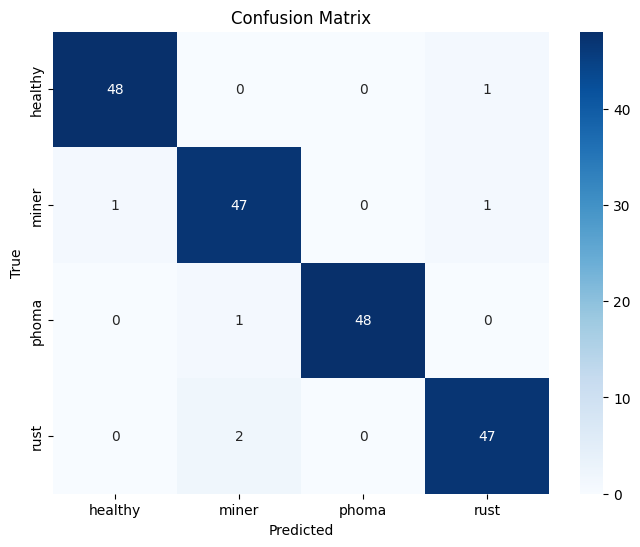

In [32]:
y_true = testing_generator.classes  # Label asli
y_pred = model.predict(testing_generator)  # Prediksi model
y_pred = np.argmax(y_pred, axis=1)

# Membuat confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
target_names = list(testing_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=target_names))


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [29]:
test_loss, test_accuracy = model.evaluate(testing_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.9750 - loss: 0.1143
Test Loss: 0.11694413423538208
Test Accuracy: 0.9693877696990967


# save model

In [30]:
model_vgg.save("D:/hamzah/skripsi/model/final_vgg16.h5")

# Test Prediction

In [ ]:
# import numpy as np
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# from tensorflow.keras.models import load_model
# from PIL import Image, ImageDraw, ImageFont
# import os

# # Memuat model Keras .h5
# model = load_model("D:/hamzah/skripsi/model/final.h5")

# def predict_image(file_path):
#     # Memuat gambar asli untuk ditampilkan
#     img = Image.open(file_path)

#     # Memuat gambar dan mempersiapkannya untuk prediksi
#     img_resized = load_img(file_path, target_size=(256, 256))
#     x = img_to_array(img_resized)
#     x = np.expand_dims(x, axis=0) / 255.0  # Normalisasi jika model memerlukannya

#     # Melakukan prediksi menggunakan model Keras
#     predictions = model.predict(x)
#     prediction = np.argmax(predictions)

#     # Menentukan label berdasarkan hasil prediksi
#     labels = ["Healthy", "Miner", "Phoma", "Rust"]
#     result = labels[prediction]

#     # Menampilkan hasil prediksi di terminal
#     print(f"File yang diupload: {file_path}")
#     print(f"Hasil Prediksi: {result}")

#     # Menambahkan teks prediksi ke gambar menggunakan PIL
#     draw = ImageDraw.Draw(img)
    
#     # Cek apakah sistem memiliki font default atau menggunakan font bawaan
#     try:
#         font = ImageFont.truetype("arial.ttf", 36)  # Menggunakan Arial dengan ukuran 36
#     except IOError:
#         font = ImageFont.load_default()  # Fallback ke font default jika Arial tidak ditemukan

#     # Menambahkan teks pada gambar
#     text_position = (10, 10)
#     draw.text(text_position, f"Prediksi: {result}", font=font, fill=(255, 0, 0))  # Teks warna merah

#     # Menampilkan gambar dengan prediksi
#     img.show()

# if __name__ == "__main__":
#     # Input file path dari pengguna
#     file_path = input("Masukkan path file gambar: ")

#     if file_path and os.path.exists(file_path):
#         predict_image(file_path)
#     else:
#         print("Tidak ada file yang dipilih atau file tidak ditemukan.")


In [ ]:
# contoh input
# D:/hamzah/skripsi/data untuk prediksi/healthy.jpg
# D:/hamzah/skripsi/data untuk prediksi/healthy2.jpg
# D:/hamzah/skripsi/data untuk prediksi/rust.jpg
# D:/hamzah/skripsi/data untuk prediksi/phoma.jpg
# D:/hamzah/skripsi/data untuk prediksi/miner.jpg

In [ ]:
# from tensorflow.keras.preprocessing import image
# import numpy as np
# import os

# # Fungsi untuk memuat dan mempersiapkan gambar untuk prediksi
# def prepare_image(img_path):
#     img = image.load_img(img_path, target_size=(256, 256))  # Sesuaikan ukuran dengan model
#     img_array = image.img_to_array(img)  # Ubah ke array numpy
#     img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch
#     img_array /= 255.  # Normalisasi gambar seperti data training
#     return img_array

# # Dapatkan label kelas dari generator yang Anda gunakan (misalnya validation_generator)
# class_labels = list(validation_generator.class_indices.keys())

# # Path folder dengan gambar
# # folder_path = 'D:/hamzah/skripsi/dataset/rust'  # Ganti dengan folder yang berisi beberapa gambar
# folder_path = 'D:/hamzah/skripsi/dataset3/testing/healthy'  # Ganti dengan folder yang berisi beberapa gambar

# # Dictionary untuk menyimpan jumlah prediksi tiap kelas
# predictions_count = {label: 0 for label in class_labels}

# # Iterasi setiap gambar dalam folder
# for img_name in os.listdir(folder_path):
#     img_path = os.path.join(folder_path, img_name)
#     img_array = prepare_image(img_path)
    
#     # Lakukan prediksi
#     prediction = model.predict(img_array)
#     predicted_class = np.argmax(prediction, axis=1)
#     predicted_label = class_labels[predicted_class[0]]
    
#     # Tambahkan ke count untuk kelas yang diprediksi
#     predictions_count[predicted_label] += 1
    
#     print(f"Image {img_name} is predicted as: {predicted_label}")

# # Setelah iterasi, tampilkan total prediksi untuk setiap kelas
# print("\nTotal Predictions:")
# for label, count in predictions_count.items():
#     print(f"{label}: {count}")


In [2]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from PIL import Image, ImageDraw, ImageFont
import os
import tkinter as tk
from tkinter import filedialog, Label, Button, Canvas, PhotoImage
from PIL import ImageTk, Image

# Memuat model Keras .h5
model = load_model("D:/hamzah/skripsi/model/final_vgg16.h5")

# Fungsi untuk memprediksi gambar
def predict_image(file_path):
    # Memuat gambar asli untuk ditampilkan
    img = Image.open(file_path)
    img_resized = load_img(file_path, target_size=(256, 256))
    x = img_to_array(img_resized)
    x = np.expand_dims(x, axis=0) / 255.0  # Normalisasi jika model memerlukannya

    # Melakukan prediksi
    predictions = model.predict(x)
    prediction = np.argmax(predictions)

    # Label prediksi
    labels = ["Healthy", "Miner", "Phoma", "Rust"]
    result = labels[prediction]
    return result, img

# Fungsi untuk memilih file gambar
def upload_image():
    file_path = filedialog.askopenfilename(filetypes=[("Image Files", "*.jpg;*.jpeg;*.png")])
    if file_path:
        result, img = predict_image(file_path)
        display_result(img, result, file_path)

# Fungsi untuk menampilkan gambar dan hasil prediksi
def display_result(img, result, file_path):
    global photo  # Untuk menjaga referensi gambar

    # Tambahkan teks hasil prediksi ke gambar
    draw = ImageDraw.Draw(img)
    try:
        font = ImageFont.truetype("arial.ttf", 36)
    except IOError:
        font = ImageFont.load_default()
    draw.text((10, 10), f"Prediksi: {result}", font=font, fill=(255, 0, 0))

    # Tampilkan gambar di GUI
    img_resized = img.resize((300, 300))  # Resize gambar untuk canvas
    photo = ImageTk.PhotoImage(img_resized)
    canvas.create_image(0, 0, anchor=tk.NW, image=photo)

    # Perbarui label hasil prediksi
    result_label.config(text=f"Hasil Prediksi: {result}")
    file_label.config(text=f"File: {os.path.basename(file_path)}")

# Membuat GUI menggunakan Tkinter
root = tk.Tk()
root.title("Prediksi Gambar dengan Model Keras")
root.geometry("400x500")

# Label dan tombol
file_label = Label(root, text="Pilih file gambar untuk diprediksi", wraplength=400)
file_label.pack(pady=10)

upload_button = Button(root, text="Pilih Gambar", command=upload_image)
upload_button.pack(pady=5)

result_label = Label(root, text="Hasil Prediksi: -", wraplength=400, font=("Arial", 12))
result_label.pack(pady=10)

# Canvas untuk menampilkan gambar
canvas = Canvas(root, width=300, height=300)
canvas.pack(pady=10)

# Menjalankan GUI
root.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
